##  State Estimates Population   (Mechine Learning)

we will look at two different methods

In [23]:
library(ggplot2)
library(plyr)
library(dplyr)
set.seed(123)
library(RColorBrewer)
library(reshape2)
#library(plotly)
library(caret)

In [24]:
#Reading it Clean population data 
Kansas_State_population <- read.csv('../../../casestudy_data/group_2/Cleaned_Kansas_State_population.csv')

### Kansas_State_population

In [25]:
head(Kansas_State_population)

X,State,X1860,X1870,X1880,X1890,X1900,X1910,X1920,X1930,⋯,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,Kansas,103116,361605,995494,1427154,1470495,1690949,1769257,1880999,⋯,2853118,2869225,2885257,2893212,2900475,2909011,2910844,2908718,2911359,2913314


In [26]:
#Dropping the index column to remove unwanted transposed rows
State_Population <- Kansas_State_population[ -c(1) ]

#transposing the data
State_Population <- melt(State_Population)

#removing the leading x
State_Population$variable <- sub("X","",State_Population$variable)

#Change Columns names( plyr does not working inthe R vis container)
#State_Population <- rename(State_Population,c("variable"="Year","value"="population"))
names(State_Population)[names(State_Population) == "variable"] <- "Year"
names(State_Population)[names(State_Population) == "value"] <- "population"

State_Population$Year <-as.numeric(State_Population$Year)

head(State_Population)

Using State as id variables


State,Year,population
<fct>,<dbl>,<int>
Kansas,1860,103116
Kansas,1870,361605
Kansas,1880,995494
Kansas,1890,1427154
Kansas,1900,1470495
Kansas,1910,1690949


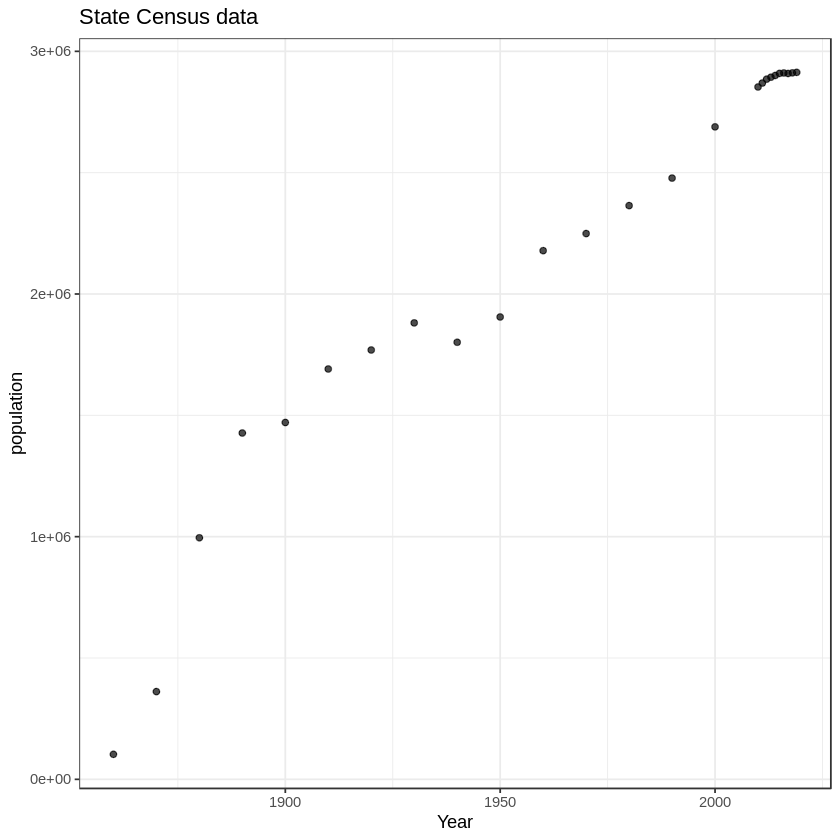

In [27]:
ggplot(data = State_Population, aes(Year, population) )+geom_point(alpha=0.7)+ggtitle("State Census data")+ theme_bw()  # Census data

In [28]:
summary(State_Population)



    State         Year        population     
 Kansas:25   Min.   :1860   Min.   : 103116  
             1st Qu.:1920   1st Qu.:1769257  
             Median :1980   Median :2364236  
             Mean   :1964   Mean   :2172730  
             3rd Qu.:2013   3rd Qu.:2893212  
             Max.   :2019   Max.   :2913314  

In [29]:
cor(State_Population$Year,State_Population$population)

[1] 0.9726395

================================================================================================================

### Linear Regression (Kansas_State_population)

since the sample size is small I tried to use the full data to create the model

#### Ordinary least squares method 

In [30]:
Year.population.lm <- lm(population ~ Year, data = State_Population)

In [31]:
summary(Year.population.lm)


Call:
lm(formula = population ~ Year, data = State_Population)

Residuals:
    Min      1Q  Median      3Q     Max 
-538271  -48862  -15127   59050  343182 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.680e+07  1.443e+06  -18.57 2.43e-15 ***
Year         1.475e+04  7.348e+02   20.08 4.44e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 195700 on 23 degrees of freedom
Multiple R-squared:  0.946,	Adjusted R-squared:  0.9437 
F-statistic: 403.1 on 1 and 23 DF,  p-value: 4.44e-16


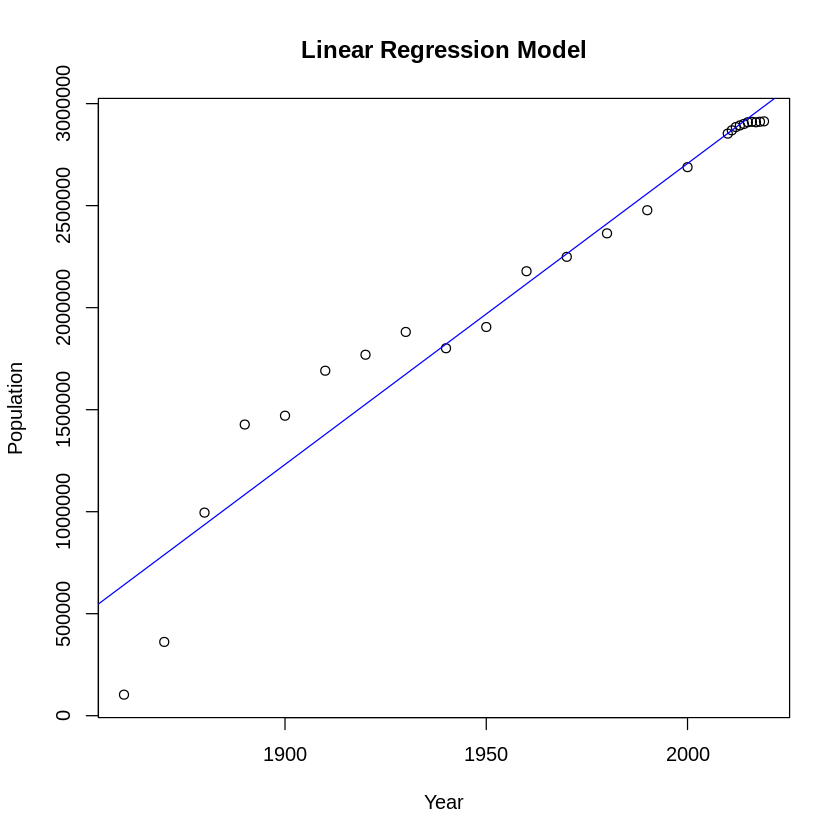

In [32]:
plot(population ~ Year, data = State_Population, main = "Linear Regression Model", xlab = "Year", ylab = "Population") # Census data
abline(Year.population.lm, col="blue")

to break the year into increments to represent a month we divid 1 year into 12 month 

In [33]:
#one year incrment numbers
N = 1


#Create a dataframe of inbetween years
estimated_State_Population_lms <- data.frame( "State" = 'Kansas', "Year" = seq(1990, 2019, by= N))


#removing already have Years  
estimated_State_Population_lms <- estimated_State_Population_lms[!(estimated_State_Population_lms$Year %in% State_Population$Year),]

tail(estimated_State_Population_lms)

,State,Year
,<fct>,<dbl>
15,Kansas,2004
16,Kansas,2005
17,Kansas,2006
18,Kansas,2007
19,Kansas,2008
20,Kansas,2009


In [34]:
estimated_State_Population_lms$population <-  predict(object = Year.population.lm,     # The regression model
                                                            newdata = estimated_State_Population_lms)   # dataframe of new data

head(estimated_State_Population_lms)

,State,Year,population
,<fct>,<dbl>,<dbl>
2,Kansas,1991,2574007
3,Kansas,1992,2588760
4,Kansas,1993,2603513
5,Kansas,1994,2618266
6,Kansas,1995,2633018
7,Kansas,1996,2647771


In [35]:
# Add datasets vertically
Full_estimated_State_Population <- rbind(State_Population, estimated_State_Population_lms)
#sort by year
Full_estimated_State_Population <- Full_estimated_State_Population[order(Full_estimated_State_Population$Year),]
# filter
Full_estimated_State_Population <- filter(Full_estimated_State_Population, Year >= 1990)

tail(Full_estimated_State_Population)

,State,Year,population
,<fct>,<dbl>,<dbl>
25,Kansas,2014,2900475
26,Kansas,2015,2909011
27,Kansas,2016,2910844
28,Kansas,2017,2908718
29,Kansas,2018,2911359
30,Kansas,2019,2913314


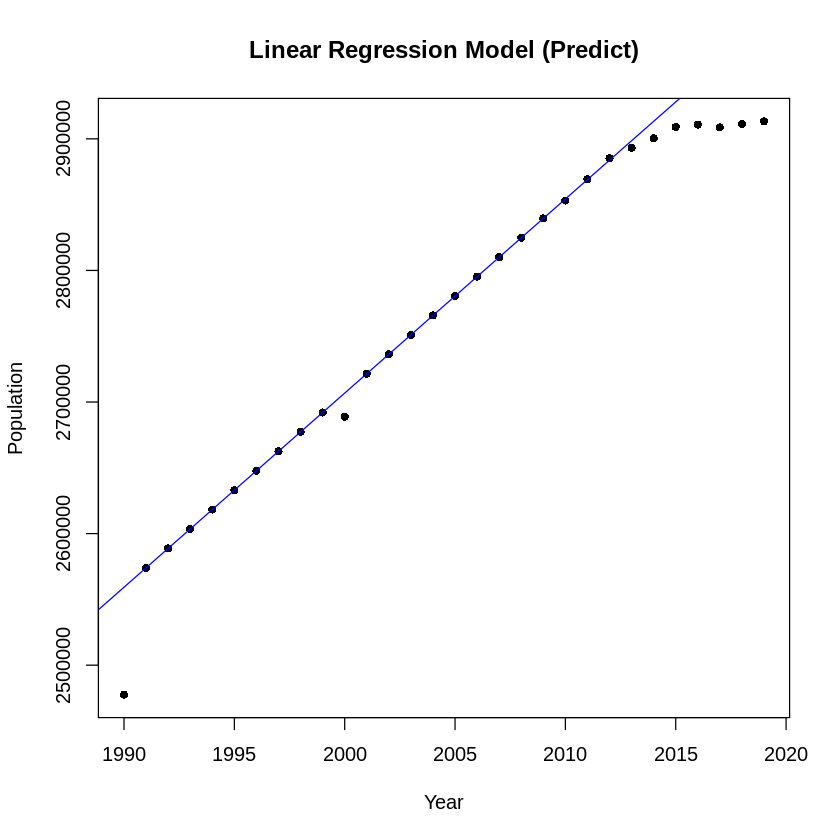

In [36]:
plot(population ~ Year, data = Full_estimated_State_Population, pch = 16, cex = .9, main = "Linear Regression Model (Predict)", xlab = "Year", ylab = "Population") # Census data
abline(Year.population.lm, col="blue")

 =====================================================================================================================

###  Exponential logistic growth  (Kansas_State_population)

#### Nonlinear Least Squares Test

In [37]:
# Take the assumed values and fit into the model.
Year.population.nls <- nls(population ~ SSlogis(Year, phi1, phi2, phi3), data = State_Population)

In [38]:
summary(Year.population.nls)


Formula: population ~ SSlogis(Year, phi1, phi2, phi3)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
phi1 3.174e+06  2.156e+05  14.717 7.20e-13 ***
phi2 1.920e+03  8.458e+00 227.018  < 2e-16 ***
phi3 4.346e+01  7.674e+00   5.663 1.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 208600 on 22 degrees of freedom

Number of iterations to convergence: 0 
Achieved convergence tolerance: 1.474e-06


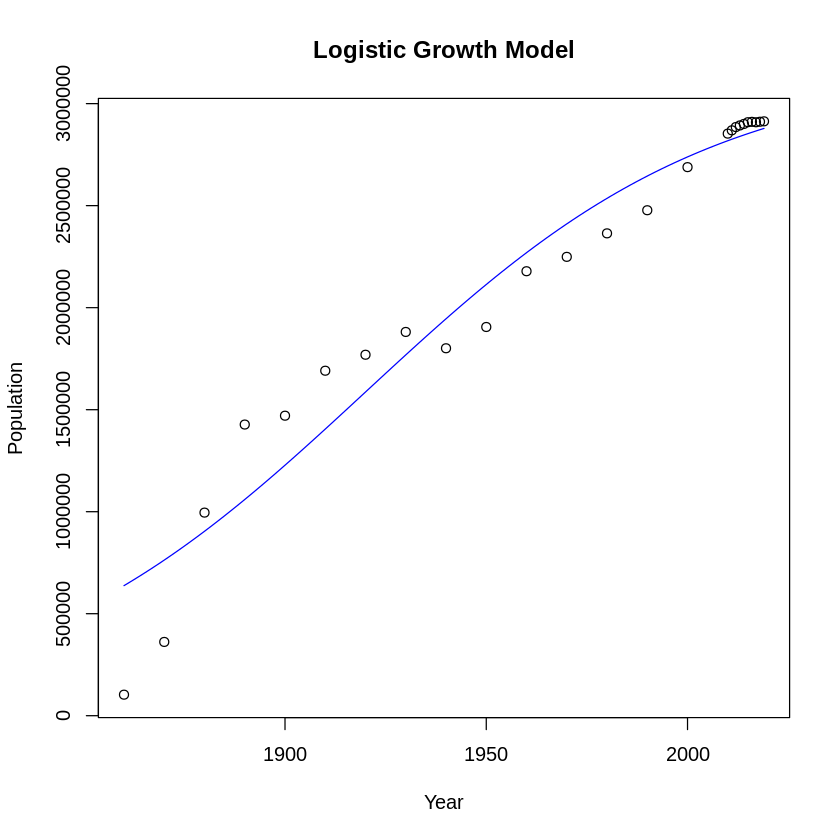

In [39]:
alpha <- coef(Year.population.nls)  #extracting coefficients

plot(population ~ Year, data = State_Population, main = "Logistic Growth Model", 
    xlab = "Year", ylab = "Population")  # Census data


curve(alpha[1]/(1 + exp(-(x - alpha[2])/alpha[3])), add = T, col = "blue")  # Fitted model

In [40]:
#one year incrment numbers
N = 1


#Create a dataframe of inbetween years
estimated_State_Population_NSL <- data.frame( "State" = 'Kansas', "Year" = seq(1990, 2019, by= N))


#removing  
estimated_State_Population_NSL <- estimated_State_Population_NSL[!(estimated_State_Population_NSL$Year %in% State_Population$Year),]

tail(estimated_State_Population_NSL)

,State,Year
,<fct>,<dbl>
15,Kansas,2004
16,Kansas,2005
17,Kansas,2006
18,Kansas,2007
19,Kansas,2008
20,Kansas,2009


In [41]:
estimated_State_Population_NSL$population <-  predict(object = Year.population.nls,     # The model
                                                            newdata = estimated_State_Population_NSL)   # dataframe of new data

head(estimated_State_Population_NSL)

,State,Year,population
,<fct>,<dbl>,<dbl>
2,Kansas,1991,2655237
3,Kansas,1992,2665139
4,Kansas,1993,2674888
5,Kansas,1994,2684483
6,Kansas,1995,2693928
7,Kansas,1996,2703222


In [42]:
# Add datasets vertically
Full_estimated_State_Population_NSL <- rbind(State_Population, estimated_State_Population_NSL)
#sort by year
Full_estimated_State_Population_NSL <- Full_estimated_State_Population_NSL[order(Full_estimated_State_Population_NSL$Year),]
# filter
Full_estimated_State_Population_NSL <- filter(Full_estimated_State_Population_NSL, Year >= 1990)

tail(Full_estimated_State_Population_NSL)

,State,Year,population
,<fct>,<dbl>,<dbl>
25,Kansas,2014,2900475
26,Kansas,2015,2909011
27,Kansas,2016,2910844
28,Kansas,2017,2908718
29,Kansas,2018,2911359
30,Kansas,2019,2913314


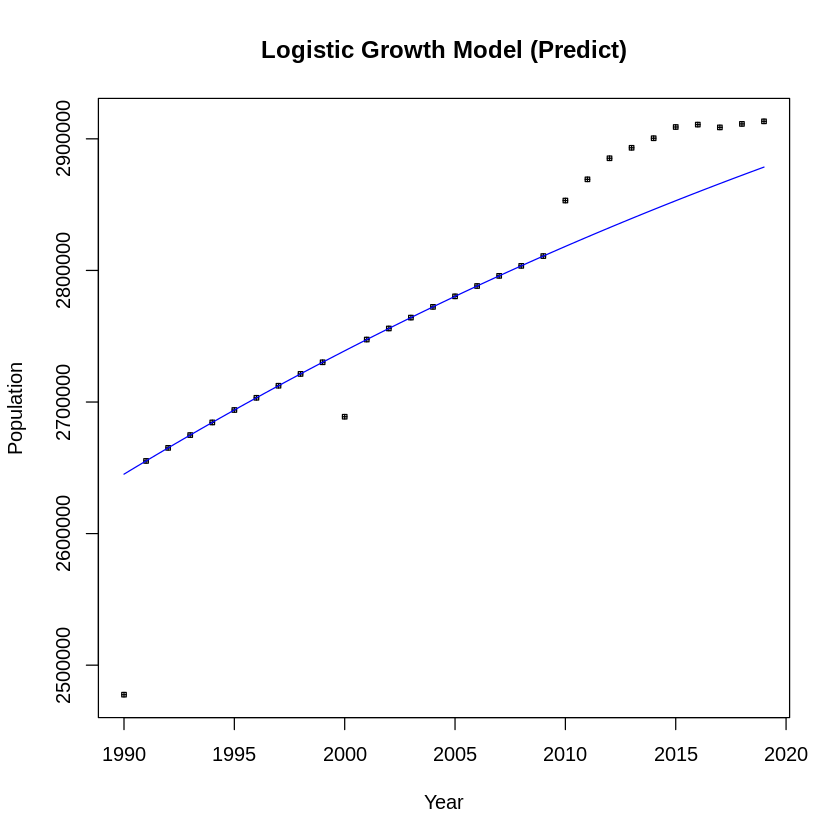

In [43]:
alpha <- coef(Year.population.nls)  #extracting coefficients

plot(population ~ Year, data = Full_estimated_State_Population_NSL, pch = 12, cex = .5, main = "Logistic Growth Model (Predict)", 
    xlab = "Year", ylab = "Population")  # Census data


curve(alpha[1]/(1 + exp(-(x - alpha[2])/alpha[3])), add = T, col = "blue")  # Fitted model

#### Since the Logistic Growth Model is  closer to fit the model we will use this to compare and estimate with other data  

 =====================================================================================================================

### Saving Estimated Population Data to CSV

In [44]:
write.csv(Full_estimated_State_Population_NSL, file="../../../casestudy_data/group_2/Estimated_states_PopulationByMonth.csv")